In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
d1 = pd.read_csv('mnist_train.csv')

In [5]:
d1.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
l = d1['label']
d1 = d1.drop('label',axis = 1)

In [15]:
print(d1.shape)

(42000, 784)


In [19]:
print(l.shape)

(42000,)


/Users/karthikch/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


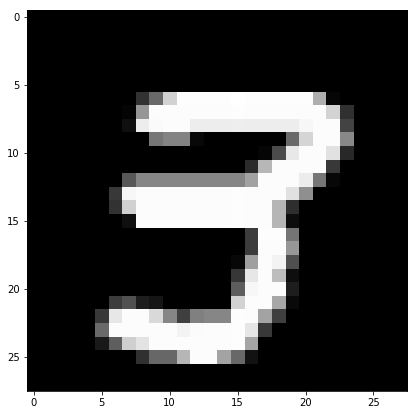

3


In [22]:
plt.figure(figsize=(7,7))
idx = 2000
g_d = d1.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(g_d,interpolation = 'none',cmap = 'gray')
plt.show()
print(l[idx])

In [26]:
l2 = l.head(15000)
d2  = d2.head(15000)
print(d2.shape)
l2.shape


(15000, 784)


(15000,)

In [34]:
from sklearn.preprocessing import StandardScaler
s_d = StandardScaler().fit_transform(d2)
s_d.shape

/Users/karthikch/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/karthikch/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(15000, 784)

In [35]:
sa_d = s_d
c_m = np.matmul(sa_d.T, sa_d)
c_m.shape

(784, 784)

In [36]:
from scipy.linalg import eigh

In [38]:
va,ve = eigh(c_m,eigvals = (782,783))
print(ve.shape)
ve = ve.T
print(ve.shape)

(784, 2)
(2, 784)


In [39]:
n_c = np.matmul(ve,sa_d.T)

In [40]:
n_c.shape

(2, 15000)

In [42]:
n_c  = np.vstack((n_c,l2)).T

In [45]:
df = pd.DataFrame(data = n_c,columns = ('f','s','l'))

In [46]:
df.head()

,f,s,l
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


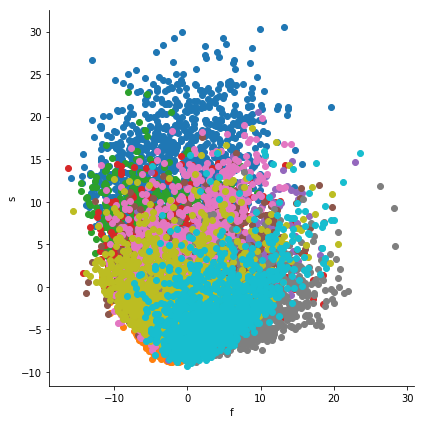

In [49]:
import seaborn as sn
sn.FacetGrid(df,hue = "l",height = 6).map(plt.scatter,'f','s')
plt.show()

In [71]:
from sklearn import decomposition 

In [72]:
pca  = decomposition.PCA()

In [73]:
pca.n_components  = 2
p_d = pca.fit_transform(sa_d)

In [74]:
p_d.shape

(15000, 2)

In [75]:
p_d = np.vstack((p_d.T,l2))

In [76]:
p_d.shape

(3, 15000)

In [77]:
p_d = p_d.T

/Users/karthikch/anaconda3/envs/fastai/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


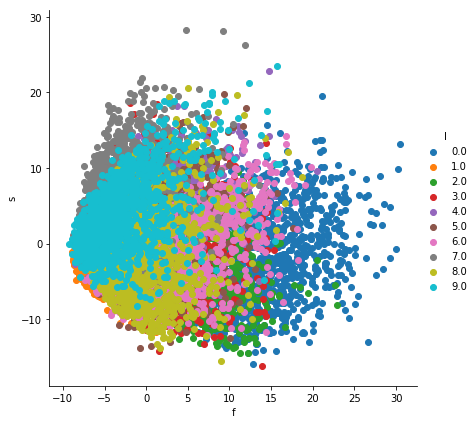

In [78]:
pca_df = pd.DataFrame(data=p_d, columns=("f", "s", "l"))
sn.FacetGrid(pca_df, hue="l", size=6).map(plt.scatter, 'f', 's').add_legend()
plt.show()

In [79]:
pca.n_components = 784

In [80]:
p_d = pca.fit_transform(sa_d)

In [81]:
p_v = pca.explained_variance_/np.sum(pca.explained_variance_)
c_v = np.cumsum(p_v)

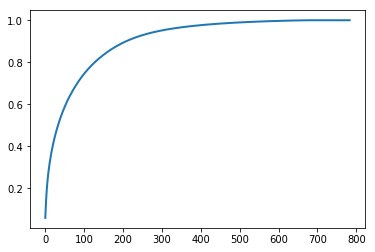

In [85]:
plt.figure(1,figsize = (6,4))
plt.plot(c_v,linewidth = 2)
plt.show()

In [86]:
from sklearn.manifold import TSNE
d3 = s_d[0:1000,:]
l3 = l[0:1000]


In [87]:
model = TSNE(n_components=2,random_state = 0)

In [88]:
t_d  = model.fit_transform(d3)
t_d = np.vstack((t_d.T,l3)).T

In [100]:
t_df = pd.DataFrame(data =t_d,columns = ('d1','d2','l'))

In [99]:
sn.FacetGrid(t_df, hue="l", height=6).map(plt.scatter,'d1', 'd2').add_legend()
plt.show()

TypeError: 'Series' objects are mutable, thus they cannot be hashed